In [21]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')


Plot the populations for the years in the period. Add legend and axis labels to the plot.

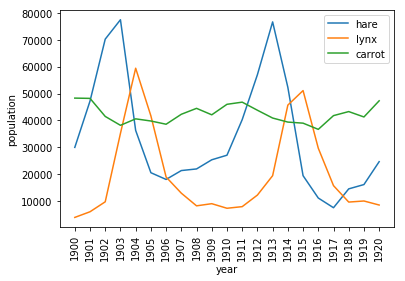

In [22]:
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], label = 'hare')
ax.plot(data[:,0], data[:,2], label = 'lynx')
ax.plot(data[:,0], data[:,3], label = 'carrot')
plt.xticks(data[:,0], rotation='vertical')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()



Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

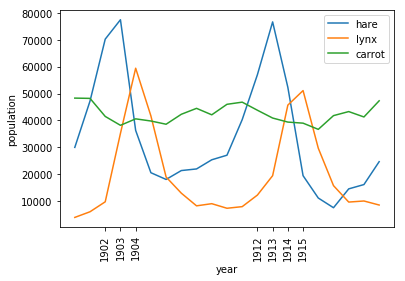

In [23]:
fig, ax = plt.subplots()
mask = (data[:,1]>=50000)|(data[:,2]>=50000)|(data[:,3]>=50000)
ax.plot(data[:,0], data[:,1], label = 'hare')
ax.plot(data[:,0], data[:,2], label = 'lynx')
ax.plot(data[:,0], data[:,3], label = 'carrot')
#ax.set_ylim(bottom = 50000)
plt.xticks(data[mask,0], rotation='vertical')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

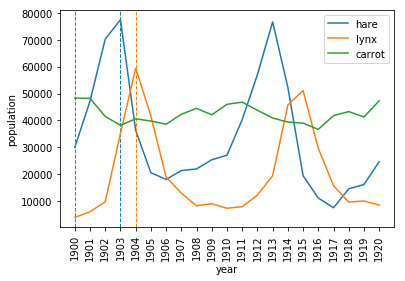

In [24]:
fig, ax = plt.subplots()

ax.plot(data[:,0], data[:,1], label = 'hare', color = 'tab:blue') 
ax.axvline(x=data[np.argmax(data[:,1]),0], linestyle='--', color = 'tab:blue', linewidth = 1 )

ax.plot(data[:,0], data[:,2], label = 'lynx', color = 'tab:orange')
ax.axvline(x=data[np.argmax(data[:,2]),0], linestyle='--', color = 'tab:orange', linewidth = 1 )

ax.plot(data[:,0], data[:,3], label = 'carrot', color = 'tab:green')
ax.axvline(x=data[np.argmax(data[:,3]),0], linestyle='--', color = 'tab:green', linewidth = 1 )

plt.xticks(data[:,0], rotation='vertical')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

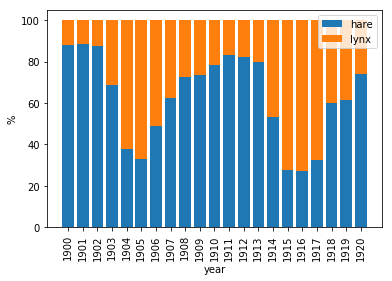

In [25]:
fig, ax = plt.subplots()
ax.bar(data[:,0], 100*data[:,1]/(data[:,1]+ data[:,2]), label = 'hare')
ax.bar(data[:,0], 100*data[:,2]/(data[:,1]+ data[:,2]),bottom = 100*data[:,1]/(data[:,1]+ data[:,2]),label = 'lynx')
plt.xticks(data[:,0], rotation='vertical')
plt.xlabel('year')
plt.ylabel('%')
plt.legend()
plt.show()


Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

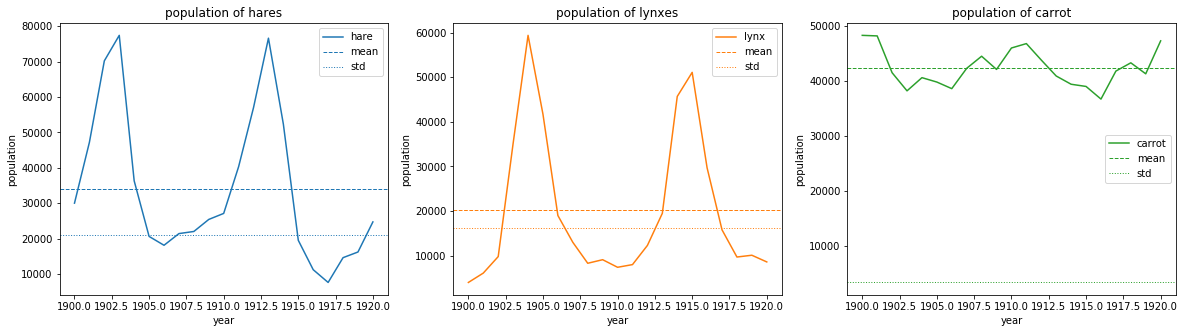

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5) )

ax1.plot(data[:,0], data[:,1], label = 'hare', color = 'tab:blue') 
ax1.axhline(y=np.mean(data[:,1]), label = 'mean',linestyle='--', color = 'tab:blue', linewidth = 1 )
ax1.axhline(y=np.std(data[:,1]), label = 'std',linestyle=':', color = 'tab:blue', linewidth = 1 )
ax1.set_xlabel('year')
ax1.set_ylabel('population')
ax1.set_title('population of hares')
ax1.legend()

ax2.plot(data[:,0], data[:,2], label = 'lynx', color = 'tab:orange')
ax2.axhline(y=np.mean(data[:,2]), label = 'mean',linestyle='--', color = 'tab:orange', linewidth = 1 )
ax2.axhline(y=np.std(data[:,2]), label = 'std',linestyle=':', color = 'tab:orange', linewidth = 1 )
ax2.set_xlabel('year')
ax2.set_ylabel('population')
ax2.set_title('population of lynxes')
ax2.legend()

ax3.plot(data[:,0], data[:,3], label = 'carrot', color = 'tab:green')
ax3.axhline(y=np.mean(data[:,3]), label = 'mean',linestyle='--', color = 'tab:green', linewidth = 1 )
ax3.axhline(y=np.std(data[:,3]), label = 'std',linestyle=':', color = 'tab:green', linewidth = 1 )
ax3.set_xlabel('year')
ax3.set_ylabel('population')
ax3.set_title('population of carrot')
ax3.legend()

plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

[['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
  'H' 'H' 'H']]


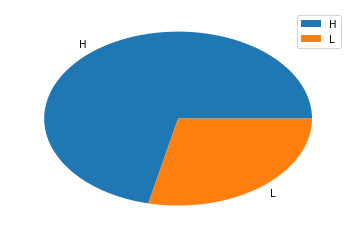

In [27]:
res = np.full((21,1),"L")
res[(data[:,1] - data[:,2] )> 0] = 'H'
print(np.transpose(res))

result=np.array(np.unique(res, return_counts=True)).T
fig, ax = plt.subplots()
ax.pie(result[:,1], labels = result[:,0] )
plt.legend()
plt.show()

Plot the change in the hare population and the number of lynxes. Find the correlation coefficient.

[[1.         0.07189206]
 [0.07189206 1.        ]]


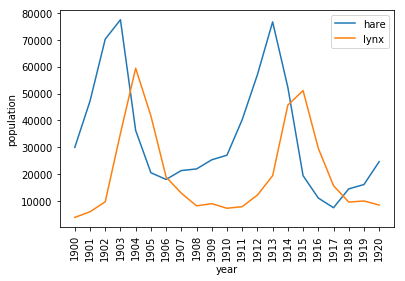

In [28]:
R = np.corrcoef(data[:,1].T , data[:,2].T)
print(R)

fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], label = 'hare')
ax.plot(data[:,0], data[:,2], label = 'lynx')
plt.xticks(data[:,0], rotation='vertical')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()


Using a scatter plot, show the population of hares vs carrots and hares vs lynxes by year on two separate subplots (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

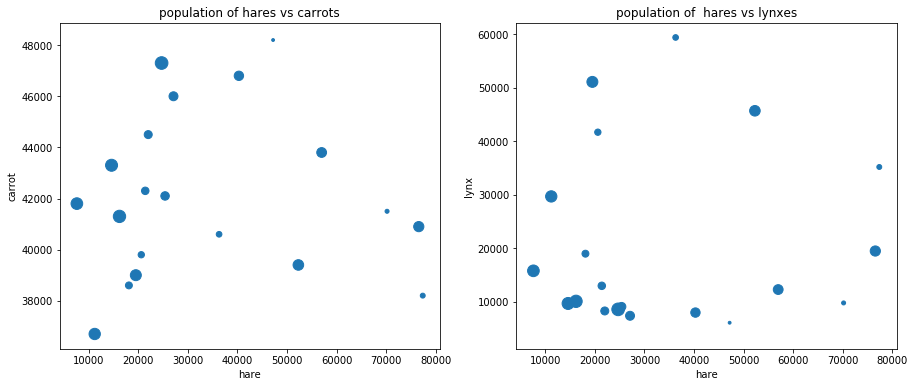

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6) )

ax1.scatter(data[:,1], data[:,3], s = (data[:,0]-1900)*8)
ax1.set_xlabel('hare')
ax1.set_ylabel('carrot')
ax1.set_title('population of hares vs carrots')

ax2.scatter(data[:,1], data[:,2],s = (data[:,0]-1900)*8)
ax2.set_xlabel('hare')
ax2.set_ylabel('lynx')
ax2.set_title('population of  hares vs lynxes')

plt.show()


Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
x = np.flip(data[:,0])[:20].reshape(-1, 1)
y = np.flip(data[:,1])[:20].T


In [32]:
model = LinearRegression().fit(x, y)
y_pred = model.predict(1920)
print("estimated value:",y_pred)
print("true value:",data[0,1])
print("error:",data[0,1] - y_pred)


estimated value: [18898.57142857]
true value: 30000.0
error: [11101.42857143]
